✅ Block diagram saved to: /Users/erfanesfahanian/Desktop/audio pattern project/results/figures/method_block_diagram.png


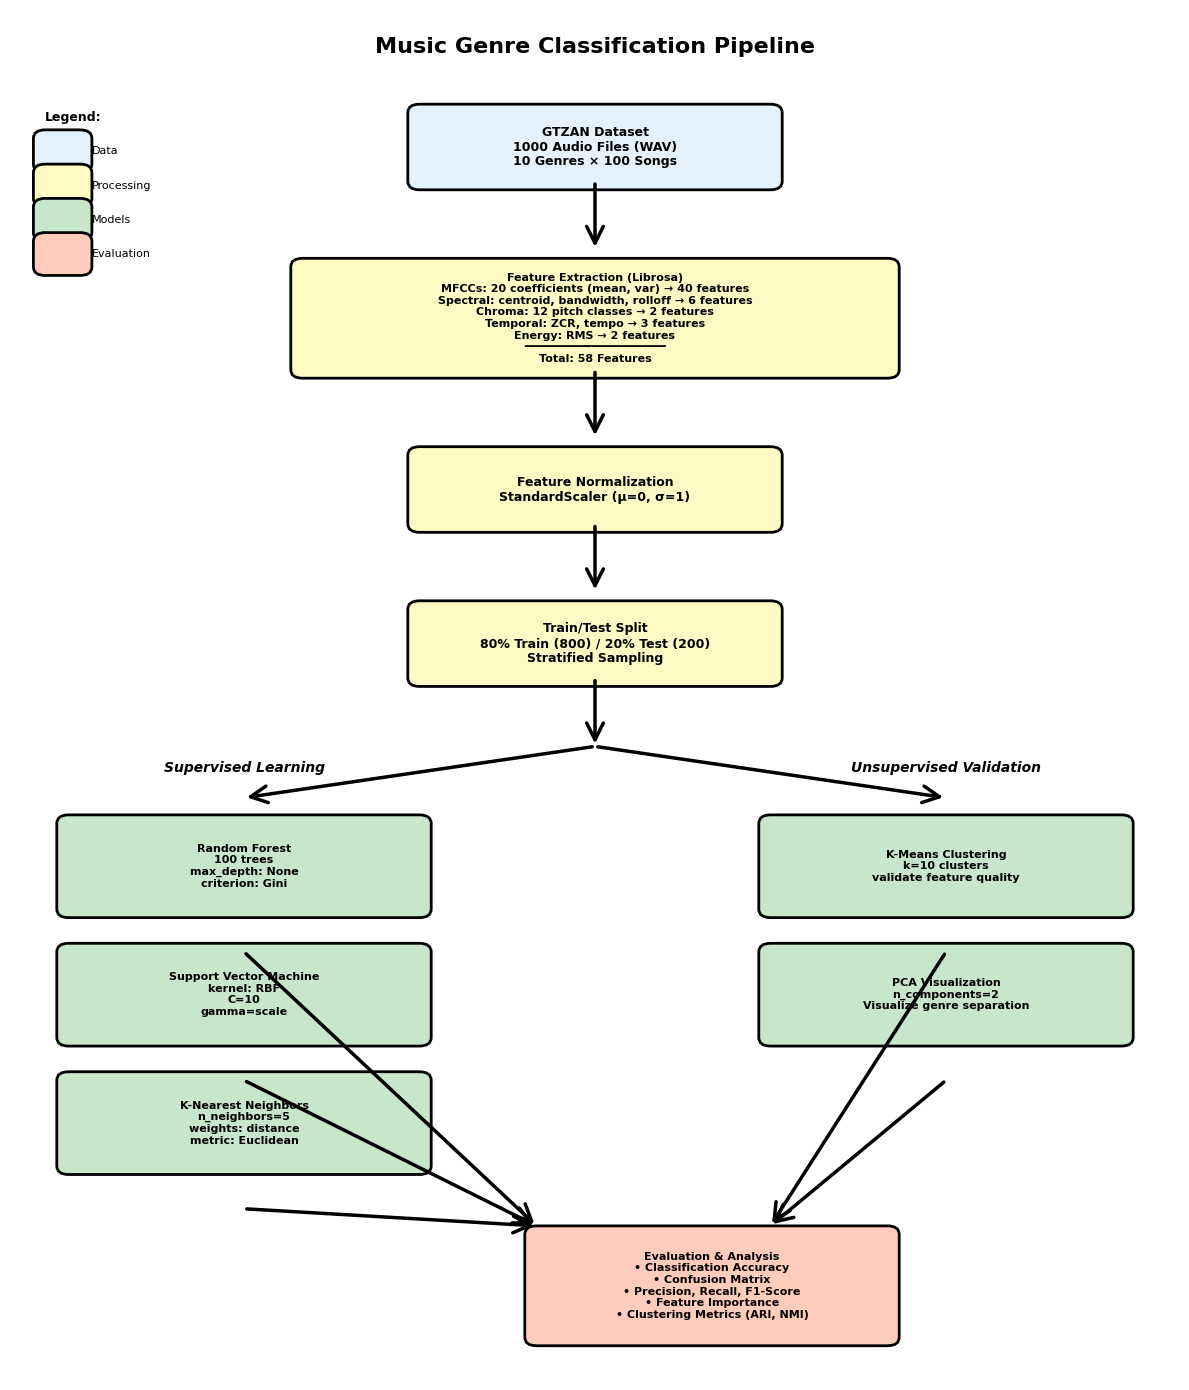

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
import numpy as np

# Create figure
fig, ax = plt.subplots(figsize=(12, 14))
ax.set_xlim(0, 10)
ax.set_ylim(0, 16)
ax.axis('off')

# Define colors
color_data = '#E3F2FD'      # Light blue for data
color_process = '#FFF9C4'   # Light yellow for processing
color_model = '#C8E6C9'     # Light green for models
color_eval = '#FFCCBC'      # Light orange for evaluation

# Helper function to draw box with text
def draw_box(ax, x, y, width, height, text, color, fontsize=10):
    box = FancyBboxPatch((x, y), width, height,
                         boxstyle="round,pad=0.1",
                         edgecolor='black',
                         facecolor=color,
                         linewidth=2)
    ax.add_patch(box)
    ax.text(x + width/2, y + height/2, text,
            ha='center', va='center',
            fontsize=fontsize,
            fontweight='bold',
            wrap=True)

# Helper function to draw arrow
def draw_arrow(ax, x1, y1, x2, y2):
    arrow = FancyArrowPatch((x1, y1), (x2, y2),
                           arrowstyle='->', 
                           lw=2.5,
                           color='black',
                           mutation_scale=30)
    ax.add_patch(arrow)

# Title
ax.text(5, 15.5, 'Music Genre Classification Pipeline',
        ha='center', fontsize=16, fontweight='bold')

# 1. Input Data
draw_box(ax, 3.5, 14, 3, 0.8,
         'GTZAN Dataset\n1000 Audio Files (WAV)\n10 Genres × 100 Songs',
         color_data, fontsize=9)
draw_arrow(ax, 5, 14, 5, 13.2)

# 2. Feature Extraction
draw_box(ax, 2.5, 11.8, 5, 1.2,
         'Feature Extraction (Librosa)\n' +
         'MFCCs: 20 coefficients (mean, var) → 40 features\n' +
         'Spectral: centroid, bandwidth, rolloff → 6 features\n' +
         'Chroma: 12 pitch classes → 2 features\n' +
         'Temporal: ZCR, tempo → 3 features\n' +
         'Energy: RMS → 2 features\n' +
         '━━━━━━━━━━━━━━━━━━━━━\n' +
         'Total: 58 Features',
         color_process, fontsize=8)
draw_arrow(ax, 5, 11.8, 5, 11)

# 3. Normalization
draw_box(ax, 3.5, 10, 3, 0.8,
         'Feature Normalization\nStandardScaler (μ=0, σ=1)',
         color_process, fontsize=9)
draw_arrow(ax, 5, 10, 5, 9.2)

# 4. Train/Test Split
draw_box(ax, 3.5, 8.2, 3, 0.8,
         'Train/Test Split\n80% Train (800) / 20% Test (200)\nStratified Sampling',
         color_process, fontsize=9)
draw_arrow(ax, 5, 8.2, 5, 7.4)

# 5. Two parallel paths: Supervised and Unsupervised
# Draw splitting arrow
draw_arrow(ax, 5, 7.4, 2, 6.8)
draw_arrow(ax, 5, 7.4, 8, 6.8)

# Left side: Supervised Learning
ax.text(2, 7.1, 'Supervised Learning', ha='center', fontsize=10, 
        fontweight='bold', style='italic')

# Model 1: Random Forest
draw_box(ax, 0.5, 5.5, 3, 1,
         'Random Forest\n100 trees\nmax_depth: None\ncriterion: Gini',
         color_model, fontsize=8)

# Model 2: SVM
draw_box(ax, 0.5, 4, 3, 1,
         'Support Vector Machine\nkernel: RBF\nC=10\ngamma=scale',
         color_model, fontsize=8)

# Model 3: KNN
draw_box(ax, 0.5, 2.5, 3, 1,
         'K-Nearest Neighbors\nn_neighbors=5\nweights: distance\nmetric: Euclidean',
         color_model, fontsize=8)

# Arrows from models to evaluation
draw_arrow(ax, 2, 5, 4.5, 1.8)
draw_arrow(ax, 2, 3.5, 4.5, 1.8)
draw_arrow(ax, 2, 2, 4.5, 1.8)

# Right side: Unsupervised Learning
ax.text(8, 7.1, 'Unsupervised Validation', ha='center', fontsize=10,
        fontweight='bold', style='italic')

# K-means
draw_box(ax, 6.5, 5.5, 3, 1,
         'K-Means Clustering\nk=10 clusters\nvalidate feature quality',
         color_model, fontsize=8)

# PCA
draw_box(ax, 6.5, 4, 3, 1,
         'PCA Visualization\nn_components=2\nVisualize genre separation',
         color_model, fontsize=8)

# Arrows from unsupervised to evaluation
draw_arrow(ax, 8, 5, 6.5, 1.8)
draw_arrow(ax, 8, 3.5, 6.5, 1.8)

# 6. Evaluation
draw_box(ax, 4.5, 0.5, 3, 1.2,
         'Evaluation & Analysis\n' +
         '• Classification Accuracy\n' +
         '• Confusion Matrix\n' +
         '• Precision, Recall, F1-Score\n' +
         '• Feature Importance\n' +
         '• Clustering Metrics (ARI, NMI)',
         color_eval, fontsize=8)

# Add legend
legend_y = 15
ax.text(0.3, legend_y-0.3, 'Legend:', fontsize=9, fontweight='bold')
draw_box(ax, 0.3, legend_y-0.8, 0.3, 0.3, '', color_data, fontsize=7)
ax.text(0.7, legend_y-0.65, 'Data', fontsize=8, va='center')

draw_box(ax, 0.3, legend_y-1.2, 0.3, 0.3, '', color_process, fontsize=7)
ax.text(0.7, legend_y-1.05, 'Processing', fontsize=8, va='center')

draw_box(ax, 0.3, legend_y-1.6, 0.3, 0.3, '', color_model, fontsize=7)
ax.text(0.7, legend_y-1.45, 'Models', fontsize=8, va='center')

draw_box(ax, 0.3, legend_y-2.0, 0.3, 0.3, '', color_eval, fontsize=7)
ax.text(0.7, legend_y-1.85, 'Evaluation', fontsize=8, va='center')

plt.tight_layout()

# Save the figure
output_path = '/Users/erfanesfahanian/Desktop/audio pattern project/results/figures/method_block_diagram.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"✅ Block diagram saved to: {output_path}")

plt.show()

✅ Simple block diagram saved to: /Users/erfanesfahanian/Desktop/audio pattern project/results/figures/method_block_diagram.png


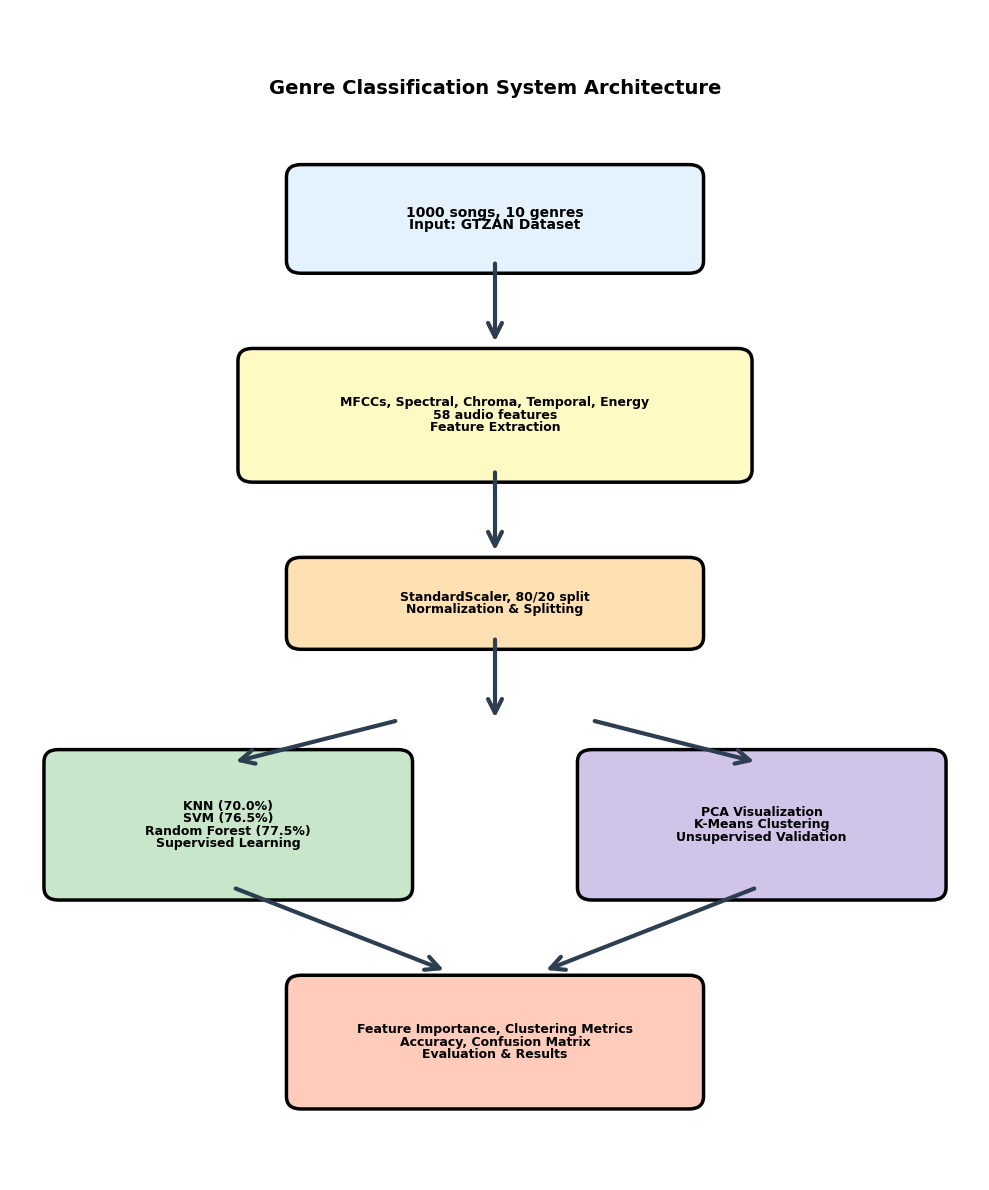

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

fig, ax = plt.subplots(figsize=(10, 12))
ax.set_xlim(0, 10)
ax.set_ylim(0, 14)
ax.axis('off')

def draw_box(ax, x, y, w, h, text, color='lightblue', fontsize=11):
    box = FancyBboxPatch((x, y), w, h,
                         boxstyle="round,pad=0.15",
                         edgecolor='black',
                         facecolor=color,
                         linewidth=2.5)
    ax.add_patch(box)
    # Split text by newlines and draw each line
    lines = text.split('\n')
    for i, line in enumerate(lines):
        y_offset = h/2 - (len(lines)-1)*0.15/2 + i*0.15
        ax.text(x + w/2, y + y_offset, line,
                ha='center', va='center',
                fontsize=fontsize, fontweight='bold')

def draw_arrow(ax, x1, y1, x2, y2):
    arrow = FancyArrowPatch((x1, y1), (x2, y2),
                           arrowstyle='->', 
                           lw=3,
                           color='#2C3E50',
                           mutation_scale=25)
    ax.add_patch(arrow)

# Title
ax.text(5, 13, 'Genre Classification System Architecture',
        ha='center', fontsize=14, fontweight='bold')

# Stage 1: Input
draw_box(ax, 3, 11, 4, 1, 
         'Input: GTZAN Dataset\n1000 songs, 10 genres', 
         '#E3F2FD', 10)
draw_arrow(ax, 5, 11, 5, 10)

# Stage 2: Feature Extraction
draw_box(ax, 2.5, 8.5, 5, 1.3,
         'Feature Extraction\n58 audio features\nMFCCs, Spectral, Chroma, Temporal, Energy',
         '#FFF9C4', 9)
draw_arrow(ax, 5, 8.5, 5, 7.5)

# Stage 3: Preprocessing
draw_box(ax, 3, 6.5, 4, 0.8,
         'Normalization & Splitting\nStandardScaler, 80/20 split',
         '#FFE0B2', 9)
draw_arrow(ax, 5, 6.5, 5, 5.5)

# Stage 4: Modeling (parallel paths)
# Supervised
draw_box(ax, 0.5, 3.5, 3.5, 1.5,
         'Supervised Learning\nRandom Forest (77.5%)\nSVM (76.5%)\nKNN (70.0%)',
         '#C8E6C9', 9)

# Unsupervised
draw_box(ax, 6, 3.5, 3.5, 1.5,
         'Unsupervised Validation\nK-Means Clustering\nPCA Visualization',
         '#D1C4E9', 9)

# Arrows to both paths
draw_arrow(ax, 4, 5.5, 2.3, 5)
draw_arrow(ax, 6, 5.5, 7.7, 5)

# Arrows from both paths to evaluation
draw_arrow(ax, 2.3, 3.5, 4.5, 2.5)
draw_arrow(ax, 7.7, 3.5, 5.5, 2.5)

# Stage 5: Evaluation
draw_box(ax, 3, 1, 4, 1.3,
         'Evaluation & Results\nAccuracy, Confusion Matrix\nFeature Importance, Clustering Metrics',
         '#FFCCBC', 9)

plt.tight_layout()

# Save
output_path = '/Users/erfanesfahanian/Desktop/audio pattern project/results/figures/method_block_diagram.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"✅ Simple block diagram saved to: {output_path}")
plt.show()